In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.morphology import reconstruction
import gc
%matplotlib inline
import data_utils as utils
import numpy as np
import  numpy
from scipy.ndimage.interpolation import rotate

# Comparison of Test and Train Statistics..

# Train

In [2]:
train = pd.read_json('train.json')

In [3]:
band1train = utils.unflattenBand(train['band_1'])
band2train = utils.unflattenBand(train['band_2'])
band3train = utils.createThirdChannel(band1train,band2train)
band3trainSubstract = utils.createThirdChannel(band1train,band2train,operation="substraction")
band3trainMultiply = utils.createThirdChannel(band1train,band2train,operation="multiplication")

# Test

In [5]:
test = pd.read_json('test.json', dtype={'inc_angle': str})

In [6]:
len(test[test["inc_angle"].apply(lambda x:len(x))<8])

3425

In [7]:
test = test[test["inc_angle"].apply(lambda x:len(x))<8].reset_index()
len(test)

3425

In [8]:
band1test = utils.unflattenBand(test['band_1'])
band2test = utils.unflattenBand(test['band_2'])
band3test = utils.createThirdChannel(band1test,band2test)
band3testSubstract = utils.createThirdChannel(band1test,band2test,operation="substraction")
band3testMultiply = utils.createThirdChannel(band1test,band2test,operation="multiplication")

In [8]:
#band1test = utils.unflattenBand(test['band_1'])
#band2test = utils.unflattenBand(test['band_2'])
#band3test = utils.createThirdChannel(band1test,band2test,operation="substraction")

## Start

In [9]:
print(band1train.shape)
print(band2test.shape)

(1604, 75, 75)
(3425, 75, 75)


# Per channel

In [10]:
print(np.mean(band1train))
print(np.mean(band1test))
print(np.mean(band2train))
print(np.mean(band2test))
print(np.mean(band3train))
print(np.mean(band3test))
print(np.mean(band3trainSubstract))
print(np.mean(band3testSubstract))
print(np.mean(band3trainMultiply))
print(np.mean(band3testMultiply))

print(np.std(band1train))
print(np.std(band1test))
print(np.std(band2train))
print(np.std(band2test))
print(np.std(band3train))
print(np.std(band3test))
print(np.std(band3trainSubstract))
print(np.std(band3testSubstract))
print(np.std(band3trainMultiply))
print(np.std(band3testMultiply))

-20.6558
-20.8035
-26.3207
-26.3318
-23.4883
-23.5676
5.66487
5.52839
553.497
557.084
5.20084
5.13649
3.39552
3.34482
3.81515
3.74682
4.35143
4.35754
170.761
167.548


## Augmentation statistics..

In [4]:
import numpy as np
import  numpy
from scipy.ndimage.interpolation import rotate

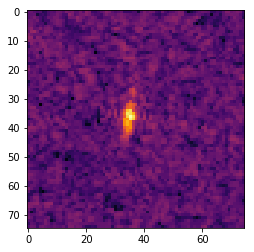

In [15]:
plt.imshow(band1train[0], cmap='inferno')

In [5]:
image = rotate(input=band1train[0], angle=90, reshape=False, axes=(0,1),)

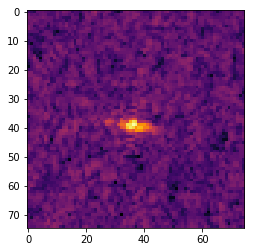

In [19]:
plt.imshow(image, cmap='inferno')

In [4]:
for i,image in enumerate(band1train):
    band1train[0] = rotate(input=band1train[i], angle=45, reshape=False, axes=(0,1),)

In [5]:
print(np.mean(band1train))
print(np.std(band1train))

-20.6491
5.20207


# Smoothing

In [15]:
band1train = utils.smoothImages(band1train)
band2train = utils.smoothImages(band2train)
gc.collect()

413

In [16]:
print(np.mean(band1train))
print(np.std(band1train))

-20.6558
4.82124


In [17]:
print(np.mean(band2train))
print(np.std(band2train))

-26.3207
2.82872


# Normalization

In [11]:
band1train = (band1train-np.mean(band1train))/np.std(band1train)
band2train = (band2train-np.mean(band2train))/np.std(band2train)
band1test = (band1test-np.mean(band1test))/np.std(band1test)
band2test = (band2test-np.mean(band2test))/np.std(band2test)

band3train = (band1train + band2train)/2
band3test = (band1test + band2test)/2
print(np.mean(band3train))
print(np.mean(band3test))
print(np.std(band3train))
print(np.std(band3test))

band3trainSubstract = (band1train - band2train)
band3testSubstract = (band1test - band2test)
print(np.mean(band3trainSubstract))
print(np.mean(band3testSubstract))
print(np.std(band3trainSubstract))
print(np.std(band3testSubstract))

band3trainMultiply = (band1train * band2train)
band3testMultiply = (band1test * band2test)
print(np.mean(band3trainMultiply))
print(np.mean(band3testMultiply))
print(np.std(band3trainMultiply))
print(np.std(band3testMultiply))


band3train = (band3train-np.mean(band3train))/np.std(band3train)
band3test= (band3test-np.mean(band3test))/np.std(band3test)
band3trainSubstract = (band3trainSubstract-np.mean(band3trainSubstract))/np.std(band3trainSubstract)
band3trainMultiply = (band3trainMultiply-np.mean(band3trainMultiply))/np.std(band3trainMultiply)
band3testSubstract = (band3testSubstract-np.mean(band3testSubstract))/np.std(band3testSubstract)
band3testMultiply = (band3testMultiply-np.mean(band3testMultiply))/np.std(band3testMultiply)


print(np.mean(band1train))
print(np.mean(band1test))
print(np.mean(band2train))
print(np.mean(band2test))
print(np.mean(band3train))
print(np.mean(band3test))
print(np.mean(band3trainSubstract))
print(np.mean(band3testSubstract))
print(np.mean(band3trainMultiply))
print(np.mean(band3testMultiply))


print(np.std(band1train))
print(np.std(band1test))
print(np.std(band2train))
print(np.std(band2test))
print(np.std(band3train))
print(np.std(band3test))
print(np.std(band3trainSubstract))
print(np.std(band3testSubstract))
print(np.std(band3trainMultiply))
print(np.std(band3testMultiply))
#print(np.corrcoef([band3train.reshape(-1),band3test.reshape(-1)]))

-6.94884e-07
2.27301e-07
0.88209
0.87773
-2.44645e-06
6.72858e-06
0.94216
0.958313
0.556167
0.540819
2.38991
2.39248
-1.91224e-06
3.60267e-06
4.95168e-07
-3.14168e-06
-1.71149e-09
3.48489e-10
8.1989e-09
1.66768e-08
-2.79453e-08
-7.04582e-09
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.999999
